https://twitter.com/kado_judo0312/status/1412968953450622977

In [1]:
using Plots
using LsqFit

In [2]:
model(t, p) = p[1] * exp.(-p[2] * t)
tdata = range(0, 10, length=21)

noise = [0.075383981064656, -0.8126158128658965, 1.5758753705225542, 1.4656391027715079, -0.5883715498465719, -0.680892588706559, 1.2067535098436946, -1.9517689516680197, 0.2532440785082103, 0.7943300540482112, -1.0897646372738818, -2.176470865841504, 0.9492433626731639, 1.3235403906519267, 0.13798106753050526, 1.0267333913533003, 0.03511342272679487, -1.5026374968513874, 0.5459381122556283, 0.6502966880952431, 1.455355259859152];

ydata = model(tdata, [1.0, 2.0]) .* exp.(noise);

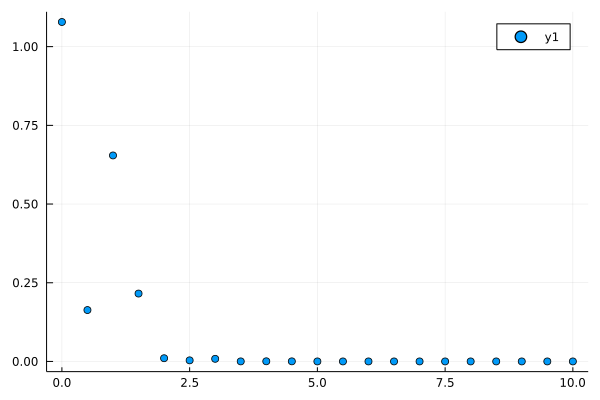

In [3]:
scatter(tdata, ydata)

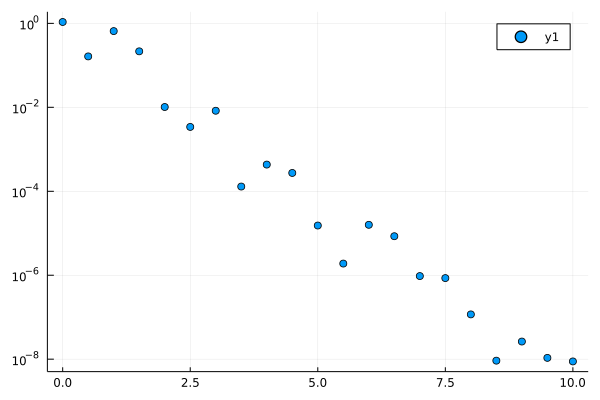

In [4]:
scatter(tdata, ydata; yscale=:log10)

In [5]:
p0 = [0.5, 0.5]
fit = curve_fit(model, tdata, ydata, p0)
param = fit.param
yFit(t) = model(t, param)

yFit (generic function with 1 method)

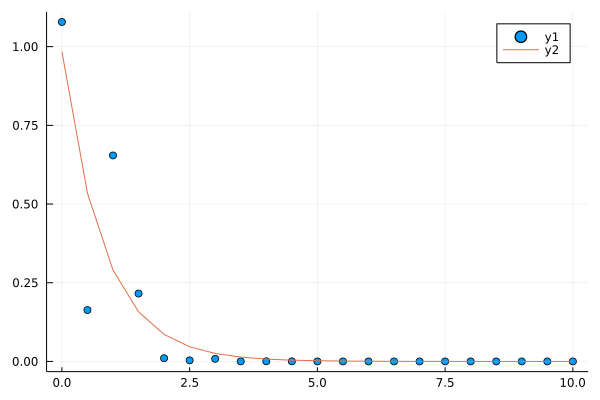

In [6]:
scatter(tdata, ydata)
plot!(tdata , yFit)

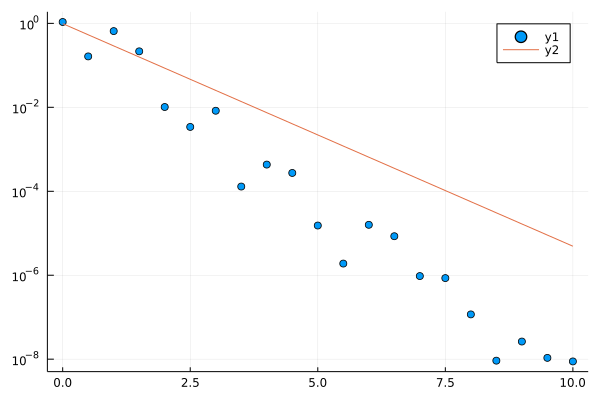

In [7]:
scatter(tdata, ydata; yscale=:log10)
plot!(tdata , yFit)

In [8]:
logmodel(t, a) = a[1] .- a[2] * t
logfit = curve_fit(logmodel, tdata, log.(ydata), [0.0, 0.0])
@show logfit.param
logyFit(t) = logmodel(t, logfit.param)

logfit.param = [-0.05617634316615601, 1.963118008620424]


logyFit (generic function with 1 method)

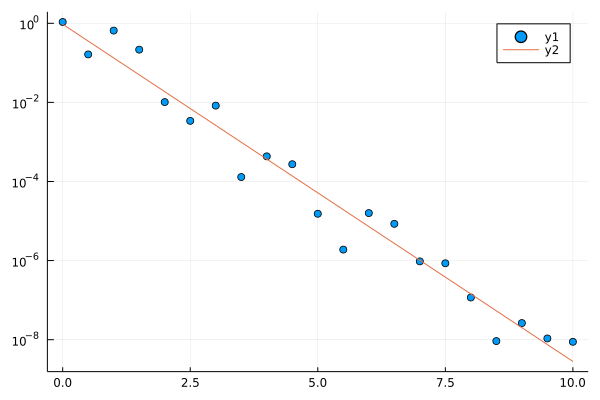

In [9]:
scatter(tdata, ydata; yscale=:log10)
plot!(tdata , exp∘logyFit)

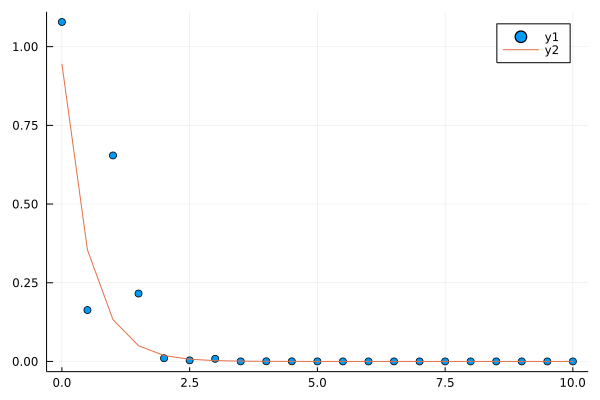

In [10]:
scatter(tdata, ydata)
plot!(tdata , exp∘logyFit)